In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv("rankingcard.csv", index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
# 探索数据以及数据预处理
# 缺失值，量纲是否统一，是否需要做哑变量
data.shape

(150000, 11)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [6]:
# 去除重复值
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [8]:
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [9]:
# 空值比例
data.isnull().sum() / data.shape[0]
# data.isnull().mean()

# 2% 的可以直接删，或者用均值填补
# 缺失 20% 的需要填补

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [10]:
# 使用均值填补家属人数
data["NumberOfDependents"].fillna(int(data["NumberOfDependents"].mean()), inplace=True)
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [11]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [12]:
from sklearn.ensemble import RandomForestRegressor as RFR

def fill_missing_rf(X, y, to_fill):
    """
    随机森林填补一个特征的缺失值
    X: 要填补的特征矩阵
    y: 完整的没有缺失值的标签
    to_fill: 要填补的列名
    """
    
    df = X.copy()
    fill = df.loc[:, to_fill]
    df = pd.concat([df.loc[:, df.columns != to_fill], pd.DataFrame(y)], axis=1)
    
    # 分训练集测试集
    YTrain = fill[fill.notnull()] # 要填的那一列非空的部分
    YTest = fill[fill.isnull()] 
    XTrain = df.iloc[YTrain.index, :]
    XTest = df.iloc[YTest.index, :]
    
    rfr = RFR(n_estimators=100)
    rfr = rfr.fit(XTrain, YTrain)
    Ypredict = rfr.predict(XTest)
    
    return Ypredict

In [13]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
X.shape

(149391, 10)

In [14]:
y_pred = fill_missing_rf(X, y, "MonthlyIncome")

In [15]:
# 确认结果合理后，将数据覆盖
data.loc[data.loc[:, "MonthlyIncome"].isnull(), "MonthlyIncome"] = y_pred

In [16]:
# 异常值
# 箱线图，3sigma 法则

# 描述性统计

# 参数为分位数
data.describe([0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000,1.493910e+05,149391.000000,149391.000000,149391.000000,149391.000000,149391.000000
mean,0.066999,6.071087,52.306237,0.393886,354.436740,5.425385e+03,8.480892,0.238120,1.022391,0.212503,0.740393
std,0.250021,250.263672,14.725962,3.852953,2041.843455,1.324809e+04,5.136515,3.826165,1.130196,3.810523,1.108272
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
1%,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
10%,0.000000,0.003199,33.000000,0.000000,0.034991,1.700000e-01,3.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.030132,41.000000,0.000000,0.177441,1.800000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154235,52.000000,0.000000,0.368234,4.420000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.556494,63.000000,0.000000,0.875279,7.416000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
90%,0.000000,0.978007,72.000000,1.000000,1275.000000,1.080000e+04,15.000000,0.000000,2.000000,0.000000,2.000000


In [17]:
(data["age"] == 0).sum()
data["NumberOfDependents"]

0         2.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
149386    0.0
149387    2.0
149388    0.0
149389    0.0
149390    0.0
Name: NumberOfDependents, Length: 149391, dtype: float64

In [18]:
#发现只有一个人年龄为0,可以判断这肯定是录入失误造成的,可以当成是缺失值来处理,直接删除掉这个样本
data = data[data["age"] != 0]

In [19]:
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90].count()

SeriousDlqin2yrs                        225
RevolvingUtilizationOfUnsecuredLines    225
age                                     225
NumberOfTime30-59DaysPastDueNotWorse    225
DebtRatio                               225
MonthlyIncome                           225
NumberOfOpenCreditLinesAndLoans         225
NumberOfTimes90DaysLate                 225
NumberRealEstateLoansOrLines            225
NumberOfTime60-89DaysPastDueNotWorse    225
NumberOfDependents                      225
dtype: int64

In [20]:
# 这些标签并不都是 1
data[data.loc[:,"NumberOfTimes90DaysLate"] > 90]

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1732,1,1.0,27,98,0.0,2700.000000,0,98,0,98,0.0
2285,0,1.0,22,98,0.0,1471.885236,0,98,0,98,0.0
3883,0,1.0,38,98,12.0,2354.260000,0,98,0,98,0.0
4416,0,1.0,21,98,0.0,0.000000,0,98,0,98,0.0
4704,0,1.0,21,98,0.0,2000.000000,0,98,0,98,0.0
...,...,...,...,...,...,...,...,...,...,...,...
146667,1,1.0,25,98,0.0,2119.529048,0,98,0,98,0.0
147180,1,1.0,68,98,255.0,4.130000,0,98,0,98,0.0
148548,1,1.0,24,98,54.0,412.390000,0,98,0,98,0.0
148634,0,1.0,26,98,0.0,2000.000000,0,98,0,98,0.0


In [21]:
data.loc[:,"NumberOfTimes90DaysLate"].value_counts()

0     141107
1       5232
2       1555
3        667
4        291
98       220
5        131
6         80
7         38
8         21
9         19
10         8
11         5
96         5
13         4
12         2
14         2
15         2
17         1
Name: NumberOfTimes90DaysLate, dtype: int64

In [22]:
# 直接删掉
data = data[data.loc[:,"NumberOfTimes90DaysLate"] < 90]
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [23]:
# 探索标签的分布

X = data.iloc[:, 1:]
y = data.iloc[:, 0]
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)
print(X.shape)

20.0
13.0
(149165, 10)


In [24]:
y.value_counts()
y

0         1
1         0
2         0
3         0
4         0
         ..
149160    0
149161    0
149162    0
149163    0
149164    0
Name: SeriousDlqin2yrs, Length: 149165, dtype: int64

In [25]:
n_sample = X.shape[0]
n_1_sample = y.value_counts()[1]
n_0_sample = y.value_counts()[0]

print("样本个数: {}; 1 占 {:.2%}; 0 占 {:.2%}".format(n_sample, n_1_sample / n_sample, n_0_sample / n_sample))

样本个数: 149165; 1 占 6.62%; 0 占 93.38%


In [26]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

In [27]:
setting = set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)

X, y = sm.fit_sample(X, y)

# SMOTE 是有插值的
for i in X.loc[:,"NumberOfDependents"]:
    if not i in setting:
        print(i)

20.0
13.0
20.0
13.0
2.3275711952117946
2.7501534064338324
2.1011117261242145
2.4326157892941342
1.8709716547926691
3.4695158468767184
1.7212799606522826
0.8756581862065133
1.37361059208117
0.42424707510744697
0.42525518866723955
1.4389866078190228
2.7705261249381214
0.5491873939994449
1.0651082026701935
0.9057461663329892
1.3705388087352546
0.718883077125489
0.44226750473575804
0.014060580689259528
0.6108883570501784
1.2610409558933382
1.4467965780019776
1.5385952457409784
0.5480830509086774
2.7296313535519405
0.7278890794905615
1.6761870127429082
2.5693019362539697
0.3740075195716557
1.789042836152551
2.627361574434263
0.5512661829845611
1.256483494572585
0.9796805754849796
0.3624707086917487
1.757575822129192
3.4358365353886007
0.8589273713587994
1.1497355605996584
0.17480233535915446
2.773957360412355
2.51864890639391
0.35531068376053865
3.9465494689602565
0.8221386703615018
1.0511670400296746
1.1027078011068403
1.870819883238452
0.3742560002328862
0.544710703991183
2.40381585242035

0.7026510511358345
0.24153390006391584
0.5445343889171437
1.6038384900169245
0.5952151203430239
2.017452711334921
1.1040954497461186
1.2950767351020653
0.21455326074280823
0.39225124222404895
2.8322618201729504
1.5894309505929392
1.405526102679247
0.2944262399826201
1.5856519318975595
0.9756140130794823
0.7478814714691405
1.6492483925144512
2.751605563925793
0.23835857384316694
0.5092805796930178
0.4550266258357494
2.2104287234982487
0.740114351779255
1.7737334609708704
3.5322850399975723
1.478289141128087
0.8955179865951971
1.2003290660130774
0.5455510784209661
0.6845406707913126
0.16240686549484784
0.3441187948654588
3.538410358938975
0.16633528535032405
4.224345731832657
2.8488422901599852
1.4644721248502035
0.11145544431855892
0.9850073943157412
0.24562015331573095
0.3663850331643126
2.418044944104861
0.6692500556705379
1.9052074838885085
2.937233664421434
0.7834065207318095
1.7292025332627414
3.7359642714653716
0.7927373850635885
2.5577968157914825
2.3684335747931744
1.14090974541

2.18884395530738
0.07891986831446285
3.3435892975246264
1.2205253033532224
0.3556708453774289
2.887183079842477
2.52617451677122
0.12312116303882248
1.3827602485346404
0.6869060938004697
0.868908980196069
3.941313106906763
0.20610617832714806
0.20326160033878682
3.1357185503023968
2.730478130699627
1.5069582609248644
0.8618050726392349
2.944376496895771
2.4473480599462913
2.1802731168303957
0.6368538058775952
0.35379563593062124
2.8874493435218227
1.2770884003362872
1.6067936479703684
1.3795652442574124
1.1410674200104576
0.09784485817558064
0.13672371494773805
0.7963912264951953
0.8439545859209107
1.7099702495571352
2.7596219444451564
0.1198001906220173
3.4537251462972103
0.06566916962993075
0.588859875930169
0.43740921818962475
0.08055642330095092
0.39619775479352826
0.44474560969801
0.991551480344504
1.1062906567144872
0.23825479529304172
0.8089472096979895
0.758121232265338
1.228324094560063
2.971204313690224
0.5211081632269043
1.2675089442141472
0.751576389640459
0.000584374302488

1.5897389251434544
1.939555898328814
1.0717595817434042
0.3031337883738223
0.2900389420758248
1.7664559927466694
0.7958676386997203
0.9358237040728186
1.043992363060827
0.2823241276495553
0.906063489283508
1.969469269971316
0.28139031374808987
2.496341249807732
2.2543127587438576
1.2143543967381656
0.5272154865339204
2.4958610465458184
0.7116724587042891
2.018183736238119
1.3892023099629158
0.12321593094524919
0.2830434098340264
1.484259280992185
0.20710052044885108
1.6299177997665597
0.6428693992695699
3.752427676410985
0.743309072330765
0.8850110334048816
1.1699729581384204
1.8882145461345696
0.4213118769433082
0.19492221440886348
0.8085277096890872
2.6722546123271966
1.2813136000072087
1.434843394956139
1.1748626662968378
1.474894356989295
0.09238686655923867
0.4306587093842089
0.3154356194666109
1.2522963116042563
1.6227075055622404
0.1634165876093684
2.388056042257752
1.3185981314210249
1.9445520473572209
0.901180676682628
0.8142260250911912
1.4876219129092694
1.5454702227152288
1

2.0737554871500277
0.5486692595583454
0.45478381692160963
2.4447927370336253
0.22467115992772535
0.9989614109374332
1.820763206912144
0.06303773168617188
0.7789873031414903
0.17115878356124348
0.3199869447043202
0.6105893894531941
2.3068570114712585
0.6027528419402677
1.1678376053011366
2.039801537282298
1.849045253481365
1.3225742121168593
1.4197664819025873
2.0649836120828446
1.170431166769422
0.19644955322274216
0.02169896200596888
0.6127567882158896
0.4748947851626786
3.5525760248386797
1.9368956872971295
1.8617206705551117
1.3179617530312182
0.14993814972078123
0.8933569747919683
2.766692316969399
0.03030143557472309
2.927526980831215
4.668446506744328
1.0546814876640018
1.2977566338395063
1.5996605219862978
0.35478899244462103
0.49858546911053736
1.0210171549700147
0.963883997994254
1.770788677023242
0.41094029975305335
3.5909919282976026
1.0594594765815535
0.5975595665828276
0.5437690768916009
0.4452902528397633
1.752412097103702
0.6348197622282561
1.6278965903933975
0.287210836

0.8708924512604929
3.4101334565466113
0.6435908567866373
0.2539440623836966
0.3778098779151735
0.4397693671716927
1.0483022165974485
1.3776450066747095
0.45112573695401725
0.6553339523384367
1.3597800822877772
1.3277119106251554
0.7516614392624834
0.9351532926787212
0.716648165013185
0.2734976297637941
2.0483988363140675
1.1471501994158584
0.8470933904356432
0.5016989686506206
2.7328411233373298
2.102373334853558
0.7351409541922598
3.7509149613456296
0.8444808202129882
0.137492062758667
0.9099426451477062
0.8603976743053923
0.5795643149805033
2.377006530556126
2.4261862603965847
1.3344423203491746
1.8258171956520823
4.02005797965313
0.30104383761092834
1.668418647744917
2.22971433823453
0.9651464995576556
0.8719026096938595
1.1311586190992788
2.3321129114991273
1.7089852689076925
1.1470083934885258
2.0393348605159707
1.4941507391420343
3.17827897883235
0.41225313299531063
2.9637186880541857
1.0318436889406013
0.5291301260553865
0.3344219580227197
1.1638430926983427
0.23560939256875546


1.0564031063636103
2.063773933613918
0.17407996713266582
1.494630690581803
1.8805539588005549
1.3315408958957586
1.084460309599819
1.8083275059077546
0.27978390726129
1.385461466032357
2.8494525668392776
0.5681452175474502
0.4455226709570479
2.5975519051279723
0.13725310532351176
0.5545838294867392
2.3884396834436594
0.9773927325419288
0.6340133111142443
0.4587333874313544
2.746493883602499
0.9114987277763764
0.21935904433752407
0.8315082468669284
0.23095463012359063
1.8117028595314855
1.6102270609151526
1.056811521803303
0.6154742871423615
1.9321325645249752
1.7467620693600365
1.9009668111899742
0.14921956058700703
0.1871341240198905
0.48852179802757223
0.780141835781947
0.6382666376668784
1.8406740153346184
0.5130442205748494
0.2780947193552661
1.8833233322778322
0.803160047979431
1.9452359665731345
0.22670930965436853
3.1063425093804153
1.0660691488085727
1.6352902912088496
0.10081356227585758
1.5647686981693338
0.6317789378586549
1.9378287645231853
0.9272724135024941
1.818186330872

0.1987860864755131
0.3575755953449935
2.9432986561073453
0.23591646526091947
1.5042810518069187
0.24145155771748006
2.600598003369185
1.3918961690818237
0.7443567570979607
1.949947295228159
0.8512355572037832
0.07201036583659282
2.1035658963002284
1.5215316215929582
0.72184704115052
0.7557452223216045
1.5654017328560488
1.357351642138433
0.6092025894107367
0.5666504356116493
0.4765301590852028
2.143920859977039
3.0147300498141774
2.5835295185749505
2.98574874710883
0.11012986109283018
0.6084392933853253
1.740274231905858
0.24607508935586142
0.9389810218459201
1.7590905291925107
3.3100480938491796
2.0317040053283684
2.2846026491528537
0.07423755270918797
0.9462432233886753
0.9026385399115082
1.0573656307677677
0.8579543450035256
2.9599545660710835
2.018952151207909
0.20959020279372353
0.2614008900916086
0.6299250674102972
0.5403044046333109
3.2742891017192894
2.298668497038333
2.4725760019234033
1.9147799356523048
0.7825209294007914
0.20118162919061766
0.1848534772453957
0.9199513712523

1.3876948115789849
0.10404483617129034
1.4237569543380597
1.2190068260468947
0.9278770460247556
0.7248660282154598
0.8629246123895332
1.9359628968873057
1.6072924321634727
2.4780166981647977
1.6839851433052249
0.2746736514194078
3.7982334736154435
0.8800139779252254
2.7234628809399415
1.2718968632457024
1.966046050003954
0.17503274888774523
1.3210816730307657
0.7147150033966739
0.09084514438862867
0.11744003376685952
2.345517203107677
0.5242824633426952
0.21112280643438863
1.0810636788704056
1.9056857074246074
0.8531135624874739
0.7458957684843723
0.8108352680258457
1.9886490904653649
1.354950872402106
0.4054295168627049
2.408206285092153
1.1100892173109678
0.160119792166747
1.0586070770630842
1.3308334357506442
0.18527892726162798
0.29557488559492706
0.7474685798375373
0.7538970210209984
0.7894994526017121
1.8909487398711224
1.5853422726036621
0.8176826628606636
3.839085774039818
0.32585585400464645
0.6326112986873034
3.9097238923640725
1.1098927797964195
0.36072044047159424
1.7137713

0.8281339895842661
1.026646911837233
1.3026650319254016
1.0613132881148057
3.776354236787035
1.711461801811783
3.077018252579903
3.119035004961792
0.2659793249144625
1.8259196676087028
0.7179380706248841
0.20247080547974972
1.7565963648861913
1.4582773886822626
1.9953068312802933
1.6074871816045666
2.054295520492442
0.44470987530805806
0.41930892267253106
0.31976641327984456
1.3953536277118441
1.1385778409987926
0.8300894367572852
1.815930375447874
0.4301334925175656
3.328532472596619
0.44572101853622537
3.496624031502861
2.1846151910644704
2.897614356615133
0.15592427316045132
1.222442078401815
0.26413196148637796
0.038182671098982324
2.155036384222675
0.5931213306217651
0.4493150281577687
0.9926170845618868
0.7200217392092552
0.22408222154911017
0.39007535853000874
0.0009054430239437972
0.07826967608139268
0.8429416934573077
1.834378111591676
2.328953929919326
2.912095351545781
2.230132967531812
1.7940057266257061
0.6165300679843577
1.1284085968403028
0.5944548224287182
0.02584450381

1.8882896365591766
1.3521310155802846
0.464041580209823
2.676975188479615
0.8261826046029606
3.456193227802128
0.6732411401238432
0.9878434613135135
2.5525820322941333
0.6688063065096785
0.5765585952041271
0.266897379600064
0.35678783805065595
2.891494019896766
0.09510063018175119
2.474823844349282
0.8273562101012951
0.8781856887352106
1.8997545104594917
0.5775384106766115
0.6274983883332981
0.4950998006057217
2.5540083859614766
0.6633745764973142
1.4583973830600154
0.8744703525886475
1.8172247619535462
1.4800676702658047
1.0605252553250124
3.276986953585896
3.275972948447287
1.6253545551068003
1.5950500796205849
0.5087984650017834
1.7430544536038552
0.036981069688523216
0.9812965491658701
0.3869467585542321
2.3233895019622706
2.8328067960996224
1.254689897890143
0.019744713322980334
0.46064530383615965
2.729431461975935
0.013179744724443054
1.8261985648174026
1.6185544965481724
0.9592113363678747
0.6203167436971028
0.710118361542204
0.286346671410608
0.8715090961507638
0.2315172905463

3.5084987786962354
1.7370962694471224
0.17462097049806313
1.2534740023095823
1.0061419111294445
2.672900002848415
0.29702964242206653
0.5745154990061434
0.5143618203334996
0.674364581843015
1.1237501892823825
1.5903987778594892
0.2876012538635683
0.5909104906216818
1.4968850420514588
1.7086042754876465
1.430421175219278
1.6177046797242234
0.8840129110718018
1.487137379689481
2.938644194490548
0.9092952244113169
0.5737853076787733
0.3324648212589798
0.9101371973553869
1.8234092758456315
0.569092880238393
0.658140894570703
1.0645309944274433
0.26285629980234004
0.24652014986314363
0.7318956507750618
2.310067449991165
2.3279969749058114
1.1320611266299898
1.965339547862993
0.6283180524753604
0.4655691886140487
0.1742801166902278
0.07894057737261106
1.4588832009977888
0.7143859616681933
1.9691901259620568
1.337239350342526
0.2627509746773027
1.9758544281861858
0.7740480490692894
2.9832318831428486
2.982490978307843
1.5011751634985082
0.33031328584287667
2.5971396919437892
1.984648684749506

2.7632905468381312
4.452540930752137
0.2693783233680562
0.0017541180022404568
1.4266538046455068
0.7463427031825558
0.3741404417328872
1.1532865441512707
0.9984086742886132
1.8466357159595865
0.9786049905945161
2.553909979352789
0.06891340673014568
2.3183023643725726
0.29660337824447036
0.9006839251033316
0.7537863734489719
2.587581877904667
2.435469509699728
0.6607409902000564
0.24998468486099235
1.6056970050752915
0.20057844866870678
1.72131084790698
2.211545554289012
0.7504372017112146
0.932489470078759
4.8482954340676905
2.825751945661191
0.2815864401180498
1.4001833778524175
2.160089637497987
0.44005438390772245
2.7899434435457744
0.04663517518262117
2.443478023777284
2.7972297227519194
1.2844775914861708
1.825192878797086
1.2282563507301454
0.6883000723397035
1.5241134009308501
1.2192605493597464
1.3835223674492474
0.5758736061451889
0.3490344755471796
0.9704577119436628
0.4208495748228056
1.9300914747033722
2.7453769078428913
0.6157669212806652
0.37542424833630994
0.577967028211

0.9312685022568585
1.5128108996291205
0.3680620262113363
1.3845504662763246
0.33058898040084417
0.17358762603811462
1.8802834710069551
1.7446057533363442
1.2405814004866662
0.5532739081803011
0.17622122492920878
0.40174190450707714
0.006209794764823973
2.2144241038835486
0.2918973642624204
0.18071116445140234
2.557773000775231
3.429283050557188
0.06592591909957246
2.8162244793150517
0.7489248055958776
0.763671614358016
0.8579684028510984
0.7176143054238473
2.258062241705035
0.3683741018795942
0.2964479238983546
0.16189056500174193
1.1152544946959424
0.19426398747532758
1.8268110856592559
1.6483279778483224
1.1490831917059985
1.0817770181056092
2.039257672973573
1.2269183491566604
2.68334353215372
3.9434594861141115
0.9264104005082574
1.11989921048299
1.7109003610922975
0.6666048534773464
1.1902173092452948
3.681153656346291
1.7828838886490763
0.044681229237836684
0.03586583657646014
0.7094626780807587
1.5227676584318321
0.7234901778208913
1.1112337332749285
1.559887606058972
0.65037350

0.5162922042181075
0.7939557387751839
0.029231865667466383
1.4512984064148258
3.4277091672945206
3.2316395291103386
0.5810584465665201
1.2731907596741554
1.7224580774791578
2.3680195774636834
0.27825509820973726
0.45387103126635286
1.0787089681754334
0.671045591534568
2.302567092944243
0.6481910393421221
1.028192109247566
2.839121645571007
0.8425913606542315
0.11499559119249503
0.6091720130921345
0.5197571146753069
0.05325051362362121
0.31650166829017623
2.7129026603426354
1.9993298631827128
0.08923654149941973
0.2202969969498374
1.2349631256357494
0.09963123785265515
0.16480492275895864
2.4330912440683163
0.26968312704254815
1.8831863861961153
0.8518584367345134
0.700317278651157
0.3719670078073337
3.368747361960496
2.615640704703586
0.817260248204895
0.05949534484048702
3.214246648858844
0.9008986854195373
0.8451368417346403
0.8587326260278987
3.936282955557205
1.671789145524136
0.5171890992968662
0.2726372644801601
2.291518303109792
0.48107893400032387
0.9731817076486035
0.575133842

1.9268703355940624
0.43057074546720775
0.7752596209620766
1.5287746489772793
0.22938673595302939
0.28902173111666474
2.1594274199999424
2.048930349981996
1.9405136944449655
0.8169204420142928
0.930536815196372
2.1866524902441498
1.9991707643051009
2.601263813633562
0.6226891142722366
3.783582764972584
3.4532662693217357
0.37220604873469254
1.7875465556957597
0.7830453898375291
0.3716134469038398
0.12902122394835436
1.8565010794131955
0.21280897597990034
0.2280944180382184
1.8220150478477777
1.0429991193618735
0.31256536016305425
1.5964184827252121
0.4146665361223931
2.534636099165522
0.34280924800686907
0.4648078811644669
0.8933882920876827
2.584170973037657
0.6390958888247357
0.33957231076494443
0.6138445190228121
0.6112618917534179
0.6357525714975576
0.8701429901673617
2.8711273675821363
0.7862831503767773
0.8228717335370721
0.9538790184488761
1.0438081908282624
0.6834241419540659
0.002938974239526715
0.9250803770634021
0.23018671597756102
2.5696478332686983
1.1142530913835653
0.0520

0.6964231741959792
2.500556266857774
1.0522269964917497
1.1737367487030017
0.8498095604484124
1.541122198591559
0.3640578313738392
0.9839350460384195
1.6071002766242812
1.9960697962772134
0.4485482023710028
0.2849863994760016
0.8428035174292127
0.051754537314032345
1.9267090619966085
0.11794210071478906
1.9744232406305289
3.9660409891041586
0.4673895769855273
1.657947996437716
1.4837279064310533
0.4422298703868581
3.4749545322675264
2.9005684301230095
0.33902206373721266
2.9725864786794673
3.005849869165973
0.6976129500872412
0.1388405220206984
1.8332348944731471
0.2100700977601787
0.2960366765437904
2.746388895999825
1.5483462230696412
0.5026020675325922
1.025843870558531
1.1277531249557629
1.3967273473754585
2.1325112695016886
2.918684679109639
3.139414000899815
1.7261824330218825
1.4568879552086078
0.15641774382421314
1.4327525626722526
0.43433596274629627
2.0365981587467714
0.693192783653387
1.3980772057605846
2.9190998260179652
0.697435025870583
0.24017338093603258
1.0635510378202

0.5557248764202919
1.6698525001228535
0.8533892701918564
0.3895969566474693
0.19779277477252155
1.1449820780997517
0.3576536492584388
0.9231809985131589
0.13201923154310147
2.04249436186804
0.13026851989894217
0.8526465399988578
0.9224326368694287
1.8972015468718992
1.4394059971484905
0.3642891648022457
1.6508069155073455
0.012584117107125703
3.3096242275347167
0.4403378792933216
0.8919256696964666
0.15832818466108134
2.664321201840017
0.7565125491804092
0.5780339246055005
0.06236637877140905
0.8179129447321835
0.26645089697094937
1.1616487098349442
0.6256359647974015
2.491573094203372
0.6448499621555885
0.2769131694149989
0.47960013975677884
0.8693669753747778
0.5128803737078997
0.6505710786223424
0.8823736715401278
0.9249599933972403
0.4300968076843643
1.178942618654315
0.36025214696946617
1.3305975320014105
0.35946290302826556
2.821597857226055
2.66308577561936
1.802104809663817
0.2852841453836821
0.874098189505728
0.43190277581193026
1.11649682610987
0.8789074726759977
0.3765724585

0.7301935549413944
0.07344902818078103
1.4303296105779646
1.574692830459273
0.6683672873433381
1.335027135202146
0.4939226596258023
1.9996795985053153
1.0557013939591022
1.7103343925146002
1.1882145548392213
0.40186953629675304
0.514834040185385
0.813848159510874
3.155869586223791
2.361540713575973
1.9380150667507918
1.347436501083917
0.1489845839060837
1.4796109171324408
1.0531619999291901
1.7110182466720998
1.3350234594149404
0.9621320845335073
0.38301658407869377
0.8668729031484216
0.7489221967307226
1.1821852114296956
1.1836473036474242
1.4755070071696414
1.0684401127402345
2.918611216215245
0.8809070146718838
2.0807305655926682
0.8142793882881767
1.8642546310199035
0.3037297209683969
0.3703527722944153
1.6420397376796925
0.9734175712178111
0.6837928517419396
0.782969272387825
0.4515076547286263
1.4345972433269552
0.756351860230841
1.3850328881556946
1.0017543084059353
0.40642505583793154
1.523077457680029
0.07076352700233013
2.339422419544349
2.824211418532334
1.953724600682386
1.

2.3211363589341296
0.4225672350148323
0.17005852523143683
2.5520722920821344
0.997700846610324
0.9985358730758636
2.4893513091676485
1.1532548401394271
0.7264684356900921
2.45233797905264
1.085330347975779
1.1122409174507601
0.028153902738131897
0.38809059575987415
0.8196262120764772
0.712261072367593
2.1875474569298032
0.707619430089107
1.087275151920839
2.193262827254422
0.026294393707001373
1.6840205020278531
5.714267865527881
1.5520121590873852
2.471113296339064
1.1960653598034483
1.838941510746355
0.8315526320856306
1.319393838529563
1.13646544199159
1.3975181629055995
0.8618737915556176
1.9978152136392158
1.1706300394330074
0.07108754593930688
0.5847642124311516
0.6729602426337111
0.9024941337265471
1.0424505802953978
0.6503629246362677
0.5746733100973594
0.529800543808652
1.0690144141310784
1.0939210788875529
1.2817847249644396
1.9436581104618356
0.5874679726330354
2.121428040853296
2.1396273337333724
0.9667430712712215
2.6530805906939485
0.9287383505940648
2.473888212367408
0.3

0.034127144557550504
0.8589854492884804
1.9206530142462928
0.25822717991389665
1.7800493474432182
1.448904230687248
0.8172749653276099
1.4603651500660029
0.7490439273127193
1.4590174260867874
3.160172979858805
0.3053413437390564
2.912294728129326
1.5301831070711158
2.4558125922613274
0.5213382748295611
1.6965072083697705
0.3119469500648745
0.8325221724442188
0.48033495127765213
0.19759450710113668
3.7787383902425487
0.9589908522212605
1.2748728906456281
0.10640717602857952
3.415330966860533
2.9787916602450712
0.9819801754052127
1.6407115059367505
0.12865844215712108
1.8259972669037077
1.7800334557839315
5.793253687394522
0.9106609655250594
1.2617050154637277
1.7803255414879033
1.2426285440513944
2.072118411911145
2.2061850692423723
1.3809878285717847
1.901870145730613
0.13430136063936127
3.629176461454337
0.4040779669836164
2.635625013281457
2.401519543020321
2.1258430265331154
0.9232791883033425
0.6006921679722839
1.960803471109827
1.875219605540014
1.5947226788191928
1.49448858291678

0.4463931250069145
1.3847163230429
0.19277988245619038
0.19101658590496728
1.8269135310306897
1.2976687051074547
2.595426754024488
1.21008056437812
0.6668440577692611
0.9407004436304004
0.6856068210329059
2.7176896700396758
3.767929939011356
0.15541967265874557
2.294122186564699
0.15158578612392237
0.2540018523514125
0.03863158794246202
0.45082371386663334
2.3636547873454763
0.1651797175204761
1.8668063810123954
1.4569631833590684
0.03652257827733674
2.934626077175876
1.9522035727490379
0.19993708696478008
2.1347886398723173
0.9197970441742904
0.7346240360057554
0.1030772679675307
1.4610787503036757
1.9224120430422706
2.1649934418306156
2.5499137253075195
0.6404690479384189
2.2221708820683577
0.41542278328972704
3.847855502818599
0.49773312571188155
0.044595330381544285
1.3674988407680144
0.6193982714746762
4.108848026132806
2.2883554324946815
0.9954208850575142
2.4417872824279527
0.09060030901392402
0.00489109624526729
0.4194091211120753
3.3580383386970554
0.8838972058788636
0.6338327

3.5117694887525275
1.0694031875204655
1.8741124340097677
2.9476468207356943
2.8756944086524836
1.460033630028138
1.67667854192403
1.5935972448986253
1.2956931456236807
0.6759584606971583
1.96760539174712
1.5688747002102945
0.8017154057384809
0.4959668309222449
0.027414960530637522
0.8595505618979624
1.9193660946038031
1.5568551322219164
2.2885026734021316
1.4695890107339802
1.1805873301159684
0.4316091048465056
1.133873132018161
2.2679292292539524
1.6385414140193544
0.42118960507621106
3.661153470760011
1.4620793385100823
0.6336592169617271
1.0009675660234238
1.1196281995310278
0.3480340973815941
0.6659072192472916
0.033650705892009136
0.2756591823547856
1.9110867665383702
0.8639723053964811
1.5221343022005012
2.5633154415057846
0.748750248914768
0.5301053229415532
0.6876963669966196
1.7576204213252802
0.09287622131220896
1.7107982748011157
1.6587102213392422
2.376223920209733
2.467626589936298
4.021088055456788
0.8673265911343788
1.3667764857796132
0.9375576298667172
1.291795259803465

0.40883950259342705
0.4525974086000035
0.428964489517495
1.3680425116138304
1.9056186020644645
1.0215215730281524
1.9310954115417407
0.931060424284547
2.6234206307638748
0.7832237257281811
3.963925453219346
2.8281265004301797
1.1167498583024018
0.928592222660701
0.5754662977204061
0.4489466716132211
2.478138708342235
1.0228485492831019
1.448522228787126
1.7251531925085755
0.8162004720252231
1.7739835569853004
2.801691448430228
2.0537226849737618
0.6075479893321295
1.2015478487133207
1.9962566843449958
0.5626964645251934
0.10626898781031158
1.6318253701441232
0.6276629181309269
0.49064719495934384
0.2265169714184121
0.7184311977051365
0.837773078545096
2.8707741973007854
0.9917123248325445
0.0029021601227646743
0.6014671762407219
0.9841522114123252
0.3764574091773085
0.4185867368762959
2.5312303531603884
1.162656031409762
1.4632246746017625
1.9941300708124845
1.242853423925052
0.8626017986415841
0.5342379348586309
0.2460242502046579
0.29546904388341344
0.9649502604837491
2.0938154460779

3.217609602726581
0.3060347965366348
2.687785800738516
0.7295076551129733
1.7114129506774813
0.2128448233054434
0.8801231374147467
1.0577550642723044
0.8026396604499795
0.452422107638645
1.5422940143311301
2.180200310651297
1.9569525384107496
2.838641854154285
1.483807223845016
2.443185094043115
2.7610443509036546
0.3195768101834334
1.8878789339861313
1.3000596208356172
1.1396257817327033
1.9996370791803093
0.23717401478792688
2.287376302026961
1.9172501277429108
0.7599314967378398
2.619491598873153
1.7217346559238293
0.462082090821722
0.6973629507449974
0.01812896573306544
0.9908807794943286
0.8572080795005816
1.5116524539075211
1.7213146094465415
1.341415657824852
1.8760872910464708
1.9287631767927325
1.799498854099052
0.08268880025074399
0.9652544017515123
0.19070643015000655
3.0363324976616535
1.4714212207243513
0.9464275321683129
0.25280048891762774
1.1987463022650822
0.06368410872304298
0.2094018622568038
1.2643773464155208
1.9758850082314166
0.8713230898708999
0.8971373185353027

0.4466333471403222
2.6493327092514702
2.2939742843105346
0.762799868405577
0.6279010439890566
0.8484891303452498
1.058710635641876
2.4434025434113025
0.0025088617990179918
2.920823554661516
0.7706972659608002
1.2336750734059247
3.303214339786935
0.28527440493113243
0.16012967289563407
1.155018710792078
2.133115670857732
1.7823355410037687
1.640222658791064
2.0309087558623036
0.18252447541564187
0.7095926315887761
1.2400458988107794
3.393148457742031
1.3145070008259407
2.6702792302487737
0.026461183309817615
0.1206607206742738
3.4324888323900202
1.114764430520223
0.8153381231687542
3.5092318568047247
1.8006862804936734
0.25877689641318147
0.024676688813313308
1.7959960084260211
2.5974423031602134
0.5921015134352785
1.6100096608946686
1.9944369121838927
0.9495751142413353
2.8431928662876667
1.433230913546493
0.2692035468194024
1.3563064076111782
0.7225061480813131
0.3167238645301933
1.9095613764281996
2.261520497474024
0.8556398225275261
2.0008448002045967
2.7689193289118563
2.9270370246

0.015873515299467345
2.4961611308852603
1.5723995491807834
1.0822490881949627
0.6463023152087932
0.8136478945982216
0.9350789810600805
0.5798005525311093
1.7865150584106848
2.443631773388492
0.14203343236675892
1.6585296110451146
1.7397508198438114
1.8057173987023996
1.7015699233222275
2.9027406452806037
1.0404191332554706
0.13866678417094602
0.370545842000777
1.7265219312132831
1.9854396614357213
0.062118296787452176
2.657629678552045
2.465708720160709
1.9916850976461857
1.7003710078881822
0.8838804999641195
0.270309466663625
1.5321494752880338
0.6126900946323803
1.4204191221265032
0.9325368450852927
1.114362556488374
2.8939087627696223
1.1482716146215712
0.8843901316567381
2.5689470692676464
0.6775756286453328
1.0559577529734923
1.5478799379570571
1.9277255795950263
1.023779899335699
0.0352118953459325
1.34150056153242
1.2574427546919076
1.1928090183943625
2.1087910305843285
0.5401365559894802
0.3510378769237533
0.023553454049274336
0.28556081321836646
0.8344930945654024
0.4328412650

0.8463642818348096
1.921283029156806
1.1725136238374136
2.5562746658300832
2.331541124726148
0.49315932424516495
0.3470140326142942
1.3065369660464194
0.7062464539142473
2.7132814637129057
0.6966594777264158
0.04755061967880547
1.888781777791878
1.1357897648439295
1.4962951178733819
2.4868874207168234
0.4406884614699724
0.23176038357195383
3.1624006893573147
1.538645221633376
2.9280662239868858
0.048750023756774286
0.2654026189599479
1.1670987867098326
2.753167506593975
2.748131653675382
1.2406623459737665
0.014724753622663567
2.760010888779331
0.3441638353322829
2.4460288047165144
0.9896883567869806
2.205845563768582
0.7227341242795492
0.9802841448613716
1.3182341390988463
0.282140797115646
0.7561765766360404
0.6523477588110047
0.9149612442741291
1.3972761637053366
2.620160728468449
2.355305978887509
1.7980047662834553
1.3003406803032396
0.12470828215894425
2.290226634240102
0.3036122954177687
1.2858454128738162
1.7381872165651513
0.4496033438684136
2.219933987119542
2.589864063161631

0.3568344479892793
0.4284739535133286
1.7069913252713684
1.2985726321669044
1.611946500044679
2.6395095738132115
0.640224555493462
0.42999812196309817
0.15031794152692457
0.2959015156039021
0.8322876437644879
0.7678750658785207
2.185699183537566
1.846353458451847
1.6387942532160096
1.3929992870545211
0.5985651759480526
0.4631741660593536
0.3880485954311055
1.2140928322121636
1.7085384800591297
1.7912290917988498
1.2070658059080137
1.594378762122494
1.6610546942205435
0.8448660315958597
1.3448042584472537
1.0031919296335183
0.619616545406364
0.3387746865010951
3.9654346407888608
0.8850479740604668
1.495809747724873
1.5709859633132657
1.682018294481909
2.7378526846065103
0.26364342735359814
0.7592120492932651
0.4900273931801765
0.6574882099173603
1.0773634860189802
4.806542090963013
0.04209838580450542
2.1934264430231973
0.1172708926224253
1.8865172326340236
3.284710163263723
2.010592880772405
2.3478139177894537
3.4423638318453165
0.8035386662260665
2.8432240169060954
0.6702266566111825


2.142570803101702
3.145196973083303
1.2106839995490517
1.2914106904085205
0.8527203492924851
2.6103525576383486
0.7073522877327181
1.1728457006099235
1.9408879736789704
1.5330179742321566
0.15151907252145047
3.478997990498334
3.513097988868995
1.1876836396970831
0.2260642519038114
0.5902575779752174
0.06111894892320846
0.6174548179738778
2.2780389322586996
1.6446215943117881
3.446670243164846
1.7874337219009402
0.4446920846555409
0.17690667827036577
2.533203206960315
2.4973865148193384
0.6061692148213382
0.5733633775127023
1.8524653784602148
1.3704600288646782
1.982774272425579
1.2476062821064602
0.2045776263140997
1.0864430948396941
1.138621305020046
3.845938236654055
1.3191881798069616
4.592942469910915
1.3250806593695252
0.2121068614529641
0.996449416891315
0.8373708872026214
1.3069394685181108
0.6205574062442898
1.3535829464144569
0.9394957490470126
1.620670747980598
0.21395615088500153
0.010549606956296698
1.333350245879397
3.85398415844457
3.3951083855721826
0.4388211599017243
1.

0.975404646308544
0.8158953499900721
2.4749425794277027
0.23674003672431942
0.2986568750614551
0.7590602078585222
2.004234743993683
3.632767964332088
0.5347134964893183
2.8491666613940625
1.6620824761832111
1.4929588722013345
1.9933702988719721
1.7404204271323198
2.7408556000724706
0.39913770240700763
0.6635770182826979
0.025133273552399027
1.6234189566317494
2.6860132571917115
0.7991895619824504
0.6224252589101403
1.4316928388926753
0.8363400623235496
0.9810038889640039
1.4004936030692199
2.8138892043556956
2.8568236592612863
1.7169831876821076
2.1723775582408864
1.3409125556191932
1.964857855787371
2.5387994319848026
0.769894541837551
1.5805357408090401
4.719465746975091
1.5112459736668717
0.20638218384577278
2.3806620475692712
2.3250514744023083
1.0385273337755077
2.492410365799474
0.6730527165605125
1.6559268444877722
0.5641813333022149
2.086086689376553
0.11016496010370935
0.6641123523847899
0.6454654380792346
0.9174283699388499
0.9362783349156967
0.6149291574955313
1.572674618103

2.1870480588527936
2.1895564284324127
0.8251930651994754
3.0211294641593405
0.08702243419704958
3.973295504043948
3.695826844092796
2.5217162900999295
0.6651251304740863
1.6721090331162356
2.8172689700167544
0.24446988575165518
0.6457707287156137
0.2751864620619875
1.1857709262318337
1.9779854272860689
0.6045070695092888
2.3164654278193915
1.8452047121783077
1.7603105783739859
0.9949947395733936
1.3720934730685004
0.6976274448781622
2.0731801596957125
2.9069272657425467
0.09538863315777923
2.217980422425611
1.8834396762629546
0.01475754709185173
0.01905072060496693
2.423706086942068
0.9608397428182847
0.9305203841044695
0.10231613977216303
3.193520207597154
1.6208071436541567
1.3012662840176008
0.2667598020383747
2.2642422841223726
1.465533692165391
4.410359779877429
1.128882871989963
0.011072631678341605
0.41386116783025906
1.0933921639868234
2.489870742657887
0.87890303216057
0.9486456914533257
3.825000585171944
0.61368254874546
0.11006040265504313
2.3748684948040846
0.92791357024524

1.591934107073751
3.1602457103014423
1.0412252581848862
0.9827427596745117
1.2100175446308037
0.2109597974118016
1.7080051457770806
0.18246367395422136
1.6615794175863452
1.327570126822356
2.684527717732548
3.6753062229961277
1.832574557519558
1.1726719733647752
3.0906691921276552
1.8384287738104887
0.5317220060473407
0.5870377500652576
0.6788259803080503
0.09711532842533588
0.22081512131802283
0.6616857262793362
1.3562837247265926
0.34982211469118185
1.9090629113887247
0.8850742533038107
2.668182257267652
1.485363308297227
4.780567243772139
0.879925703179231
0.2046753826002068
1.8462856899063942
1.5657320949482834
0.3246145556524289
0.5203041542547753
2.880418681685463
4.949431060543816
0.3534902429520249
1.9065267671084687
0.7665167022054318
1.1766567087874005
1.5352587297303284
1.7073743374267787
2.7845582850259225
0.5501419753415023
1.1986418877199858
1.5670407442022483
0.7720311677361988
1.7195530728954174
0.5021861248363968
1.8020220600260677
1.4729848107007975
3.8194992209028205

0.7059761413199835
0.6097285049541028
2.695557103525301
0.034379582099981265
0.24143182170804023
0.2798446359642188
2.3584624288060665
0.9830531111633976
2.4403242157336438
2.7643576729093624
0.6553683598932178
1.8753362803112945
0.66417385990877
1.3665456884259248
2.7690246800739313
0.8636421190130258
0.2637683898707298
0.8655678025992166
2.996931561650182
1.2804897962994837
0.7612530144862918
0.9945632505816431
1.5574683046776279
1.8919407477265824
0.12455542340449355
0.1760358350216089
0.1512656966746394
2.185558681872552
1.0911905744158292
2.330075374413794
2.2322901845569696
2.1523725542850913
0.2678355947550968
0.82059664551756
1.0565642876163361
2.053572416587625
0.24027007557374924
1.5365472043983144
0.01723227286778295
1.6735848331909795
0.6624240128630688
0.792340507484469
0.6638432801545817
0.2697889820151911
0.3275091161894401
1.4830438823122893
0.18043002389881624
1.4961881670105681
2.048159251741276
2.1702502174245852
1.5007798701171207
0.8024790531676327
2.56214551362071

0.3809468910990297
0.4260425372105533
1.820902115181532
1.8948044440203555
0.7338019497055519
0.5396784098707913
1.0511057446321168
1.0662414528513935
3.14243464174341
1.7954480547142044
2.812855188205915
1.5137817045631055
0.804418720498796
2.5928135422614047
2.7874429371508365
3.2369574542943305
1.23667371219555
1.9086418814618977
2.967751222618353
2.490007526860348
0.051227597225365296
0.10471372951061109
0.9229519465057917
0.15409049378520467
1.1917738433994014
0.9464257963455912
1.385290165258748
1.2540144266686077
1.2622779120286336
0.3453017891567306
1.9035694145927424
3.4576283172891733
0.051076598153822594
0.044052534993339054
0.02961222605241276
0.04403006773508866
1.4628074839177114
1.2586338624966773
0.4289402247659009
2.2093288860527363
1.9129610733324327
0.762401122717759
2.558273888447776
0.775779123575583
2.044084149355401
1.826470413365278
2.53207017397884
1.759382592973965
1.8502609441513642
2.5093949794860526
1.5968186843213186
1.0153007935946108
3.5038788727873147
0

1.4031347976373931
0.2956282526776447
2.2910181530531872
1.5929044203123042
0.40543764818518224
0.30018645149160117
2.682917572097574
1.5626674682519415
2.3251786207645573
0.4027241299167793
2.4060333700259022
0.12919696491305555
0.45132517136184813
0.23582776020110263
2.1347935207232345
1.6142359769736208
1.9520944218036806
1.502761727875961
1.830691520786101
1.3132432866444521
0.6392556588618503
1.1464767562130174
0.4810703849007637
0.23811407275304453
0.9913030187238749
0.5697001876969728
3.175167567544299
1.9795090152412302
0.4787121112038236
1.5885346397352105
1.6355786729334896
1.6383068935418894
0.40253148385922033
0.11495512757970772
2.970430875277486
1.8019048215978064
0.2642663922960994
0.03716505712357776
1.022549153486446
2.938560433456879
1.4686006926463602
2.5338655862903785
2.257731566812811
1.9378024443807023
0.3825246478207104
1.8090559345428032
3.472399783498246
2.8817603545469224
1.525390863075788
0.6312807686552311
2.5482400667880416
0.3707676478770757
0.50583105023

0.4519763484857523
1.7253870255823849
2.177949306609703
0.5772784081622601
1.0161122011511823
3.9969200569127747
0.9276744922582363
0.8346740928906792
3.024721641874306
1.3578096424197224
2.4720444424607586
1.7459143315682513
3.3603477780236326
0.03839741861578372
0.7881159595768337
0.8159423827862331
0.33019761940335246
2.014290116913951
0.6011689271088507
2.3006553752127727
2.031067815900002
2.111375983279073
0.918845243122187
1.5495972225012058
0.9057463035778369
1.7824985441879697
0.32002283381811925
1.221110375672167
0.7594322291963264
0.7705516755004054
0.2592629811639342
1.1511533821909035
0.8676756219754453
0.6354520752692631
0.7151964689989859
0.47379195449142775
3.316409347158968
1.423736470180952
1.47085998197101
0.9127100464381728
1.2360643129501006
3.928773132060322
1.86604497791242
1.575299971898887
0.9286686674041376
0.6719560380881906
1.9913379866979475
0.9284603436627056
2.093778910165224
4.553706916196143
1.4253383843209846
1.7461163759801797
0.7895360239026012
0.5435

2.049142543271718
1.6252798334448608
0.5716396711847063
1.5184248948940673
1.65704142573244
3.9749392784325357
0.9811497711411765
1.711243687748127
1.0224848993753428
1.8117851905268703
1.4615607390750793
1.4570484467719205
0.11789066606905951
1.9944873857441008
0.765617016761267
1.1069246122708254
0.8387261108348762
1.6110205071875217
1.3137394754450742
2.8253456335256883
0.7547520882126723
0.17735502174080575
2.8193660687519873
0.5561864295316172
1.3355625888307654
0.5248392361290692
0.37439878132935445
2.064960049266128
2.7292214919762285
1.7574751279660161
0.45256940198677253
3.2595165795167285
1.5849339356235759
0.7265254988183689
1.3882552042096097
1.7961263343254326
2.8279788490463758
2.406671041336782
1.8766991547618022
3.8308069732657417
0.8008702170120392
1.8306567575952832
0.6791783466550324
1.7416437416460158
1.642284063130273
1.1584576567787952
0.6990552086400212
0.2425313811066393
0.635306193744481
3.8017807251115303
1.7980242792499017
0.47242765632073946
0.07854823658475

0.7488605700525053
1.7145744459033856
0.7738612433794281
0.29537316921966217
0.0887575337339288
0.21831412184536436
0.6826584442247043
1.5805850839780144
0.4356348979667264
1.0790049227708223
0.7196493562167492
0.8873577599972406
2.124331240751289
1.2373658842884132
0.7323979631018147
2.805684667705426
1.1769342683819688
0.932311093986641
0.2583858618750936
2.043416616832314
0.310105509316825
0.632706505285888
0.36269349267561024
0.9612771694707373
1.2347574714718765
1.0462048690818957
0.23875237372852753
0.3187018770317065
0.6494238037861146
2.452499956238114
1.1447989639834613
1.9799614072803342
0.737767981777568
0.1216768742639962
1.3425817886687599
0.5351033028574119
0.0952875106019695
0.40512603438115224
0.7541705981008464
0.15198874247436212
0.8397684758011319
0.9283521157610057
1.7548613572653204
2.320922457734504
0.21521496005575436
0.9766970649458387
1.3800100183871364
1.9594407648903371
1.7285758116951226
0.39747450811764873
1.191665088924336
1.4532296700147838
0.677740605100

In [28]:
n_sample_ = X.shape[0]
n_sample_

278584

In [29]:
pd.Series(y).value_counts()

1    139292
0    139292
Name: SeriousDlqin2yrs, dtype: int64

In [30]:
# 分训练集和测试集

from sklearn.model_selection import train_test_split

X = pd.DataFrame(X)
y = pd.DataFrame(y)

XTrain, XTest, YTrain, YTest = train_test_split(X, y, test_size=0.3, random_state=420)



In [31]:
model_data = pd.concat([YTrain, XTrain], axis=1)
model_data.index = range(model_data.shape[0])
model_data.columns = data.columns

In [32]:
test_data = pd.concat([YTest, XTest], axis=1)
test_data.index = range(test_data.shape[0])
test_data.columns = data.columns

In [33]:
model_data.to_csv("model_data.csv")
model_data["NumberOfDependents"]
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.015404,53,0,0.121802,4728.000000,5,0,0,0,0.000000
1,0,0.168311,63,0,0.141964,1119.000000,5,0,0,0,0.000000
2,1,1.063570,39,1,0.417663,3500.000000,5,1,0,2,3.716057
3,0,0.088684,73,0,0.522822,5301.000000,11,0,2,0,0.000000
4,1,0.622999,53,0,0.423650,13000.000000,9,0,2,0,0.181999
...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32,2,0.548132,6000.000000,10,0,1,0,3.966830
195004,1,0.484728,50,1,0.370603,5258.000000,12,0,1,0,2.000000
195005,1,0.850447,46,0,0.562610,8000.000000,9,0,1,0,2.768793
195006,0,1.000000,64,0,0.364694,10309.000000,7,0,3,0,0.000000


In [34]:
test_data.to_csv("test_data.csv")

In [35]:
# 分箱：离散化连续变量

In [36]:
model_data["age"]

0         53
1         63
2         39
3         73
4         53
          ..
195003    32
195004    50
195005    46
195006    64
195007    53
Name: age, Length: 195008, dtype: int64

In [37]:
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)
"""
pd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化
只能够处理一维数据。返回箱子的上限和下限
参数q:要分箱的个数
参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series
现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限
"""

'\npd.qcut,基于分位数的分箱函数,本质是将连续型变量离散化\n只能够处理一维数据。返回箱子的上限和下限\n参数q:要分箱的个数\n参数retbins=True来要求同时返回结构为索引为样本索引,元素为分到的箱子的Series\n现在返回两个值:每个样本属于哪个箱子,以及所有箱子的上限和下限\n'

In [38]:
updown

array([ 21.,  28.,  31.,  34.,  36.,  39.,  41.,  43.,  45.,  46.,  48.,
        50.,  52.,  54.,  56.,  58.,  61.,  64.,  68.,  74., 107.])

In [39]:
model_data["qcut"].value_counts()

(36.0, 39.0]      12658
(20.999, 28.0]    11779
(58.0, 61.0]      11387
(48.0, 50.0]      11125
(46.0, 48.0]      10973
(31.0, 34.0]      10825
(50.0, 52.0]      10551
(43.0, 45.0]      10357
(61.0, 64.0]      10178
(39.0, 41.0]       9780
(52.0, 54.0]       9692
(41.0, 43.0]       9689
(28.0, 31.0]       9534
(74.0, 107.0]      9132
(64.0, 68.0]       8894
(54.0, 56.0]       8715
(68.0, 74.0]       8670
(56.0, 58.0]       7879
(34.0, 36.0]       7494
(45.0, 46.0]       5696
Name: qcut, dtype: int64

In [40]:
model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
qcut,,,,,,,,,,,
"(20.999, 28.0]",4243,4243,4243,4243,4243,4243,4243,4243,4243,4243,4243
"(28.0, 31.0]",3571,3571,3571,3571,3571,3571,3571,3571,3571,3571,3571
"(31.0, 34.0]",4075,4075,4075,4075,4075,4075,4075,4075,4075,4075,4075
"(34.0, 36.0]",2908,2908,2908,2908,2908,2908,2908,2908,2908,2908,2908
"(36.0, 39.0]",5182,5182,5182,5182,5182,5182,5182,5182,5182,5182,5182
"(39.0, 41.0]",3956,3956,3956,3956,3956,3956,3956,3956,3956,3956,3956
"(41.0, 43.0]",4002,4002,4002,4002,4002,4002,4002,4002,4002,4002,4002
"(43.0, 45.0]",4389,4389,4389,4389,4389,4389,4389,4389,4389,4389,4389
"(45.0, 46.0]",2419,2419,2419,2419,2419,2419,2419,2419,2419,2419,2419


In [41]:
# 统计每个分箱中 0 和 1 的数量
# 数据透视表功能 groupby

count_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby(by="qcut").count()["SeriousDlqin2yrs"]
count_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby(by="qcut").count()["SeriousDlqin2yrs"]

In [42]:
# zip 按照最短的列结合
num_bins = [*zip(updown, updown[1:], count_y0, count_y1)]

In [43]:
# 每个箱的上界，下界，0 出现的次数， 1 出现的次数
num_bins

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [44]:
# 确保每个箱中都有 0 和 1
for i in range(20):
    # 如果第一个组没有包含正样本或负样本，向后合并
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0]
                          ,num_bins[1][1]
                          ,num_bins[0][2] + num_bins[1][2]
                          ,num_bins[0][3] + num_bins[1][3]
                         )]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i - 1 : i + 1] = [(num_bins[i - 1][0]
                                       ,num_bins[i][1]
                                       ,num_bins[i - 1][2] + num_bins[i][2]
                                       ,num_bins[i - 1][3] + num_bins[i][3]
                                      )]
            break
        else:
            break
    
    print(len(num_bins))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


In [45]:
num_bins

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [46]:
# 定义 WOE 和 IV 函数

def get_woe(num_bins):
    columns = ["min", "max", "count_0", "count_1"]
    df = pd.DataFrame(num_bins, columns=columns)
    
    df["total"] = df.count_0 + df.count_1 # 一个箱中所有的样本数
    df["percentage"] = df.total / df.total.sum() # 一个箱子里所有的样本数，占所有样本数的比例
    df["bad_rate"] = df.count_1 / df.total  
    df["good%"] = df.count_0 / df.count_0.sum()
    df["bad%"] = df.count_1 / df.count_1.sum()
    df["woe"] = np.log(df["good%"] / df["bad%"])
    return df

def get_iv(df):
    rate = df["good%"] - df["bad%"]
    iv = np.sum(rate * df.woe)
    return iv

In [47]:
a = get_woe(num_bins)
a

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,4243,7536,11779,0.060403,0.639783,0.043433,0.077438,-0.578257
1,28.0,31.0,3571,5963,9534,0.048890,0.625446,0.036554,0.061274,-0.516564
2,31.0,34.0,4075,6750,10825,0.055511,0.623557,0.041713,0.069361,-0.508508
3,34.0,36.0,2908,4586,7494,0.038429,0.611956,0.029767,0.047124,-0.459378
4,36.0,39.0,5182,7476,12658,0.064910,0.590615,0.053045,0.076821,-0.370343
5,39.0,41.0,3956,5824,9780,0.050152,0.595501,0.040495,0.059846,-0.390590
6,41.0,43.0,4002,5687,9689,0.049685,0.586954,0.040966,0.058438,-0.355224
7,43.0,45.0,4389,5968,10357,0.053111,0.576229,0.044927,0.061325,-0.311146
8,45.0,46.0,2419,3277,5696,0.029209,0.575316,0.024762,0.033673,-0.307410
9,46.0,48.0,4813,6160,10973,0.056269,0.561378,0.049268,0.063298,-0.250592


In [48]:
i = get_iv(a)
i

0.35387457268516326

In [49]:
# 卡方检验，合并箱体，画出 IV 曲线

num_bins_ = num_bins.copy()

In [50]:
import matplotlib.pyplot as plt
import scipy

In [51]:
IV = []
axisx = []

In [52]:
num_bins_
x1 = num_bins_[0][2:]
x2 = num_bins_[1][2:]
scipy.stats.chi2_contingency([x1, x2])

(4.602513123396287, 0.03192512495115096, 1, array([[4318.542955, 7460.457045],
        [3495.457045, 6038.542955]]))

In [53]:
while len(num_bins_) > 2:
    print(len(num_bins_))
    pvs = []
    # 获取 bum_bin_ 两两之间卡方检验的置信度
    for i in range(len(num_bins_) - 1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i + 1][2:]
        pv = scipy.stats.chi2_contingency([x1, x2])[1] # 1 是 p 值, 0 是 chi 值
        pvs.append(pv)
    
    # 通过 p 值处理，合并 p 值最大的两组
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0]
                        ,num_bins_[i][1]
                        ,num_bins_[i][2] + num_bins_[i + 1][2]
                        ,num_bins_[i][3] + num_bins_[i + 1][3]
                       )]
    
    bins_df = get_woe(num_bins_)
    axisx.append(len(num_bins_))
    IV.append(get_iv(bins_df))
        

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3


In [54]:
axisx

[19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2]

In [55]:
IV

[0.3538743095168232,
 0.35387275036390614,
 0.3538710624374351,
 0.35385946197605384,
 0.353839566218523,
 0.353806256596582,
 0.35376211395019197,
 0.353683324154017,
 0.35347127923893057,
 0.3531983799176634,
 0.3523969551724,
 0.35167710429444393,
 0.3506485070804906,
 0.34793574843736824,
 0.342953008453291,
 0.33469412104145907,
 0.3186665484111149,
 0.2762263051346199]

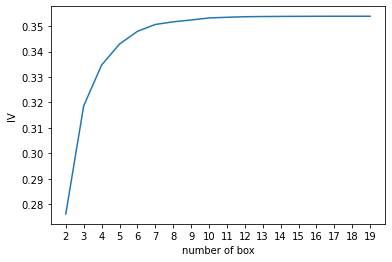

In [56]:
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel("number of box")
plt.ylabel("IV")
plt.show()

In [57]:
# 用最佳分箱个数分箱，验证分箱结果

def get_bin(my_num_bins, n):
    """
    my_num_bins: 待分箱
    n: 分箱个数 
    """
    while len(my_num_bins) > n:
        print(len(my_num_bins))
        pvs = []
        for i in range(len(my_num_bins) - 1):
            x1 = my_num_bins[i][2:]
            x2 = my_num_bins[i + 1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)
        
        i = pvs.index(max(pvs))
        my_num_bins[i: i+2] = [(my_num_bins[i][0]
                            ,my_num_bins[i][1]
                            ,my_num_bins[i][2] + my_num_bins[i + 1][2]
                            ,my_num_bins[i][3] + my_num_bins[i + 1][3]
                           )]
        
    return my_num_bins

In [58]:
aa = num_bins.copy()
aa

[(21.0, 28.0, 4243, 7536),
 (28.0, 31.0, 3571, 5963),
 (31.0, 34.0, 4075, 6750),
 (34.0, 36.0, 2908, 4586),
 (36.0, 39.0, 5182, 7476),
 (39.0, 41.0, 3956, 5824),
 (41.0, 43.0, 4002, 5687),
 (43.0, 45.0, 4389, 5968),
 (45.0, 46.0, 2419, 3277),
 (46.0, 48.0, 4813, 6160),
 (48.0, 50.0, 4900, 6225),
 (50.0, 52.0, 4728, 5823),
 (52.0, 54.0, 4681, 5011),
 (54.0, 56.0, 4677, 4038),
 (56.0, 58.0, 4483, 3396),
 (58.0, 61.0, 6583, 4804),
 (61.0, 64.0, 6968, 3210),
 (64.0, 68.0, 6623, 2271),
 (68.0, 74.0, 6753, 1917),
 (74.0, 107.0, 7737, 1395)]

In [59]:
afterbins = get_bin(aa, 4)

20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5


In [60]:
afterbins

[(21.0, 28.0, 53867, 76286),
 (54.0, 56.0, 15743, 12238),
 (61.0, 64.0, 20344, 7398),
 (74.0, 107.0, 7737, 1395)]

In [61]:
bins_df = get_woe(aa)

In [62]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.0,28.0,53867,76286,130153,0.667424,0.586126,0.551402,0.783892,-0.351807
1,54.0,56.0,15743,12238,27981,0.143486,0.437368,0.161151,0.125754,0.248014
2,61.0,64.0,20344,7398,27742,0.142261,0.266671,0.208248,0.076020,1.007741
3,74.0,107.0,7737,1395,9132,0.046829,0.152760,0.079199,0.014335,1.709284


In [63]:
# 选取最佳分箱的过程

def graphforbestbin(DF, X, Y, n=5,q=20,graph=True):
    """
    自动最优分箱函数,基于卡方检验的分箱
    参数:
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X], retbins=True, q=q,duplicates="drop")
    coount_y0 = DF.loc[DF[Y]==0].groupby(by="qcut").count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by="qcut").count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(num_bins[0][0]
                              ,num_bins[1][1]
                              ,num_bins[0][2]+num_bins[1][2]
                              ,num_bins[0][3]+num_bins[1][3]
                              )]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0]
                                      ,num_bins[i][1]
                                      ,num_bins[i-1][2]+num_bins[i][2]
                                      ,num_bins[i-1][3]+num_bins[i][3]
                                      )]
                break
            else:
                break

    def get_woe(num_bins):
        columns = ["min","max","count_0","count_1"]
        df = pd.DataFrame(num_bins,columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0/df.count_0.sum()
        df["bad%"] = df.count_1/df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    IV = []
    axisx = []

    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins) -1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i+2] = [(num_bins[i][0]
                            ,num_bins[i+1][1]
                            ,num_bins[i][2]+num_bins[i+1][2]
                            ,num_bins[i][3]+num_bins[i+1][3]
                            )]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx,IV)
        plt.xticks(axisx)
        plt.xlabel("number of box")
        plt.ylabel("IV")
        plt.show()

    return bins_df


In [64]:
model_data.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'qcut'],
      dtype='object')

RevolvingUtilizationOfUnsecuredLines


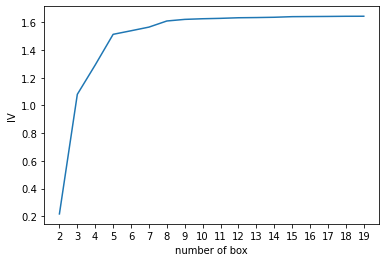

age


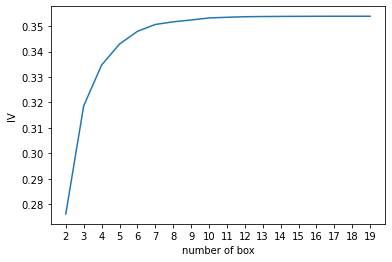

NumberOfTime30-59DaysPastDueNotWorse


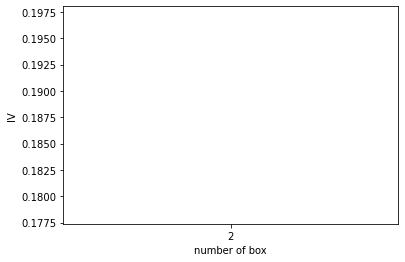

DebtRatio


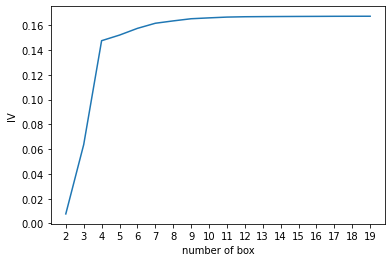

MonthlyIncome


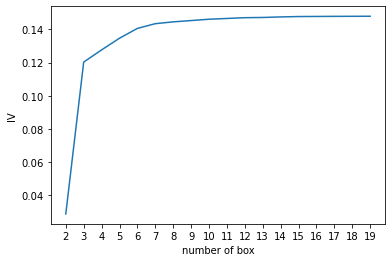

NumberOfOpenCreditLinesAndLoans


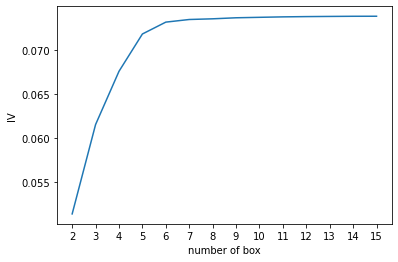

NumberOfTimes90DaysLate


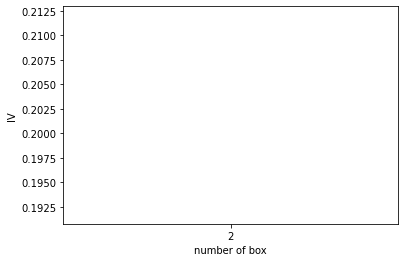

NumberRealEstateLoansOrLines


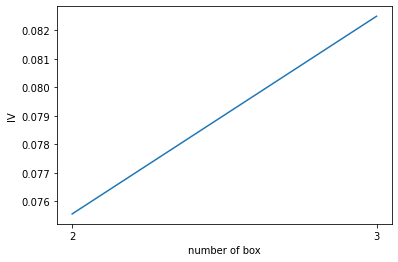

NumberOfTime60-89DaysPastDueNotWorse


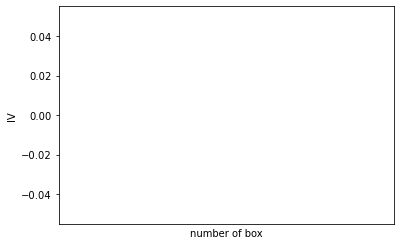

UnboundLocalError: local variable 'bins_df' referenced before assignment

In [65]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data, i, "SeriousDlqin2yrs", n=2, q=20)

In [66]:
model_data["NumberOfDependents"]

0         0.000000
1         0.000000
2         3.716057
3         0.000000
4         0.181999
            ...   
195003    3.966830
195004    2.000000
195005    2.768793
195006    0.000000
195007    0.000000
Name: NumberOfDependents, Length: 195008, dtype: float64

In [67]:
# 不是所有特征都可以走这个分箱流程，因为有的特征无法分出20组
# 解法：将可以分箱的特征单独分组，不能自动分箱的自己观察后手写

auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6
                 ,"age":5
                 ,"DebtRatio":4
                 ,"MonthlyIncome":3
                 ,"NumberOfOpenCreditLinesAndLoans":5
                }

#不能使用自动分箱的变量

hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
             ,"NumberOfTimes90DaysLate":[0,1,2,17]
             ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
             ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
             ,"NumberOfDependents":[0,1,2,3]
            }

#保证区间覆盖使用 np.inf替换最大值,用-np.inf替换最小值

hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [69]:
# 对所有特征按照选择的箱体个数和手写的分箱范围进行分箱
bins_of_col = {}

# 生成自动分箱的分箱区间和分箱后的 IV 值

for col in auto_col_bins:
    bins_df = graphforbestbin(model_data
                              ,col
                              ,"SeriousDlqin2yrs"
                              ,n=auto_col_bins[col]
                              ,q=20
                              ,graph=False
                             )
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    # 保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0], bins_list[-1] = -np.inf, np.inf
    bins_of_col[col] = bins_list
    
# 合并手动分箱数据
bins_of_col.update(hand_bins)

bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09896562775000001,
  0.29795157950623663,
  0.46539575630658647,
  0.982433609957634,
  0.9999998999999999,
  inf],
 'age': [-inf, 36.0, 54.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.0174052246, 0.4015874604009382, 1.468980734700383, inf],
 'MonthlyIncome': [-inf, 0.0918258701658992, 5588.527706034215, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [73]:
# 计算各个箱子的 WOE 并映射到数据中

data = model_data.copy()

# pd.cut 根据已知的分箱间隔把数据分箱
data = data[["age", "SeriousDlqin2yrs"]].copy()
data["cut"] = pd.cut(data["age"], [-np.inf, 36.0, 54.0, 61.0, 74.0, np.inf])
data

,age,SeriousDlqin2yrs,cut
0,53,0,"(36.0, 54.0]"
1,63,0,"(61.0, 74.0]"
2,39,1,"(36.0, 54.0]"
3,73,0,"(61.0, 74.0]"
4,53,1,"(36.0, 54.0]"
...,...,...,...
195003,32,1,"(-inf, 36.0]"
195004,50,1,"(36.0, 54.0]"
195005,46,1,"(36.0, 54.0]"
195006,64,0,"(61.0, 74.0]"


In [74]:
# 按照分箱结果取出其中的标签值
# 对每个箱中的 1 和 0 计数
data.groupby("cut")["SeriousDlqin2yrs"].value_counts()

cut           SeriousDlqin2yrs
(-inf, 36.0]  1                   24835
              0                   14797
(36.0, 54.0]  1                   51451
              0                   39070
(54.0, 61.0]  0                   15743
              1                   12238
(61.0, 74.0]  0                   20344
              1                    7398
(74.0, inf]   0                    7737
              1                    1395
Name: SeriousDlqin2yrs, dtype: int64

In [75]:
#使用unstack()来将树状结构变成表状结构
data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

SeriousDlqin2yrs,0,1
cut,,
"(-inf, 36.0]",14797,24835
"(36.0, 54.0]",39070,51451
"(54.0, 61.0]",15743,12238
"(61.0, 74.0]",20344,7398
"(74.0, inf]",7737,1395


In [76]:
bins_df = data.groupby("cut")["SeriousDlqin2yrs"].value_counts().unstack()

In [77]:
bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))

In [79]:
bins_df

SeriousDlqin2yrs,0,1,woe
cut,,,
"(-inf, 36.0]",14797,24835,-0.521665
"(36.0, 54.0]",39070,51451,-0.279111
"(54.0, 61.0]",15743,12238,0.248014
"(61.0, 74.0]",20344,7398,1.007741
"(74.0, inf]",7737,1395,1.709284


In [80]:
def get_woe(df, col, y, bins):
    df = df[[col, y]].copy()
    df["cut"] = pd.cut(df[col], bins)
    bins_df = df.groupby("cut")[y].value_counts().unstack()
    woe = bins_df["woe"] = np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

In [81]:
# 将所有 WOE 存储到字典中
woeall = {}

for col in bins_of_col:
    woeall[col] = get_woe(model_data, col, "SeriousDlqin2yrs", bins_of_col[col])
    
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.198230
 (0.099, 0.298]    0.671875
 (0.298, 0.465]   -0.126136
 (0.465, 0.982]   -1.074512
 (0.982, 1.0]     -0.471753
 (1.0, inf]       -2.040392
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.521665
 (36.0, 54.0]   -0.279111
 (54.0, 61.0]    0.248014
 (61.0, 74.0]    1.007741
 (74.0, inf]     1.709284
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0174]     1.509166
 (0.0174, 0.402]    0.036123
 (0.402, 1.469]    -0.388177
 (1.469, inf]       0.175920
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.0918]        1.260170
 (0.0918, 5588.528]   -0.228737
 (5588.528, inf]       0.232293
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.845814
 (1.0, 3.0]    -0.331984
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.462551
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351477
 (0.0, 1.0]    -0.871595
 (1.0, 2.0]    -1.374065
 (2.0, inf]    -1.540188
 dt

In [82]:
# 将所有 WOE 映射到原始数据
model_woe = pd.DataFrame(index=model_data.index)

In [83]:
model_woe["age"] = pd.cut(model_data["age"], bins_of_col["age"]).map(woeall["age"])

In [84]:
model_woe.head()

,age
0,-0.279111
1,1.007741
2,-0.279111
3,1.007741
4,-0.279111


In [85]:
for col in bins_of_col:
    model_woe[col] = pd.cut(model_data[col], bins_of_col[col]).map(woeall[col])

In [86]:
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,-0.279111,2.198230,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237
1,1.007741,0.671875,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237
2,-0.279111,-2.040392,-0.388177,-0.228737,-0.054617,-0.871595,-1.765493,-0.394182,-1.773746,-0.477150
3,1.007741,2.198230,-0.388177,-0.228737,0.124218,0.351477,0.237600,0.616878,0.124957,0.623237
4,-0.279111,-1.074512,-0.388177,0.232293,0.124218,0.351477,0.237600,0.616878,0.124957,-0.578310


In [87]:
# 将标签补充到数据中
model_woe["SeriousDlqin2yrs"] = model_data["SeriousDlqin2yrs"]

In [89]:
# 最终的建模数据(特征矩阵)
model_woe.head()

,age,RevolvingUtilizationOfUnsecuredLines,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.279111,2.198230,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237,0
1,1.007741,0.671875,0.036123,-0.228737,-0.054617,0.351477,0.237600,-0.394182,0.124957,0.623237,0
2,-0.279111,-2.040392,-0.388177,-0.228737,-0.054617,-0.871595,-1.765493,-0.394182,-1.773746,-0.477150,1
3,1.007741,2.198230,-0.388177,-0.228737,0.124218,0.351477,0.237600,0.616878,0.124957,0.623237,0
4,-0.279111,-1.074512,-0.388177,0.232293,0.124218,0.351477,0.237600,0.616878,0.124957,-0.578310,1


In [91]:
# 处理测试集

# 将已经计算好的 WOE 映射到测试集
test_woe = pd.DataFrame(index=test_data.index)

for col in bins_of_col:
    test_woe[col] = pd.cut(test_data[col], bins_of_col[col]).map(woeall[col])

test_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]

In [92]:
x = model_woe.iloc[:,:-1]
y = model_woe.iloc[:,-1]
test_x = test_woe.iloc[:,:-1]
test_y = test_woe.iloc[:,-1]

In [93]:
from sklearn.linear_model import LogisticRegression as LR

lr = LR().fit(x, y)
lr.score(test_x, test_y)

0.7750789700392458

In [94]:
# 用 C 和 max_iter 调参

c_1 = np.linspace(0.01, 1, 20)
c_2 = np.linspace(0.01, 0.2, 20)

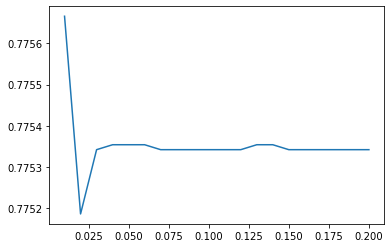

In [96]:
score = []
for i in c_2:
    lr = LR(solver="liblinear", C=i).fit(x, y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot(c_2, score)
plt.show()

In [97]:
lr.n_iter_

array([5], dtype=int32)

/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/ppp/anaconda3/envs/python-3.6/lib/python3.6/site-packages/sklearn/svm/_base.py:977: Conver

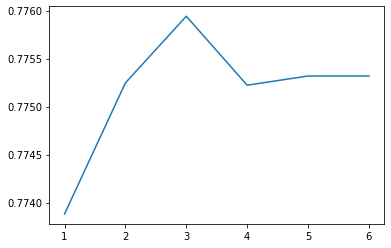

In [100]:
score = []
for i in [1,2,3,4,5,6]:
    lr = LR(solver='liblinear', C=0.025, max_iter=i).fit(x,y)
    score.append(lr.score(test_x, test_y))
plt.figure()
plt.plot([1,2,3,4,5,6],score)
plt.show()

In [102]:
# ROC 曲线
# pip install scikit-plot
import scikitplot as skplt

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

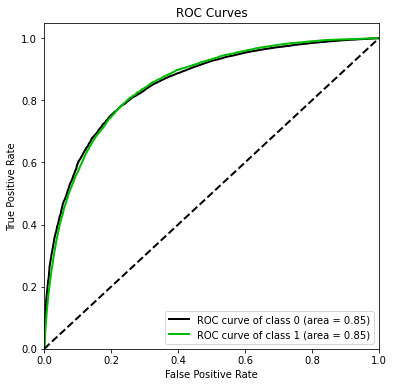

In [105]:
test_proba_df = pd.DataFrame(lr.predict_proba(test_x))
skplt.metrics.plot_roc(test_y, test_proba_df
                       ,plot_micro=False
                       ,figsize=(6,6)
                       ,plot_macro=False
                      )

In [106]:
# 制作评分卡
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.099]     2.198230
 (0.099, 0.298]    0.671875
 (0.298, 0.465]   -0.126136
 (0.465, 0.982]   -1.074512
 (0.982, 1.0]     -0.471753
 (1.0, inf]       -2.040392
 dtype: float64, 'age': cut
 (-inf, 36.0]   -0.521665
 (36.0, 54.0]   -0.279111
 (54.0, 61.0]    0.248014
 (61.0, 74.0]    1.007741
 (74.0, inf]     1.709284
 dtype: float64, 'DebtRatio': cut
 (-inf, 0.0174]     1.509166
 (0.0174, 0.402]    0.036123
 (0.402, 1.469]    -0.388177
 (1.469, inf]       0.175920
 dtype: float64, 'MonthlyIncome': cut
 (-inf, 0.0918]        1.260170
 (0.0918, 5588.528]   -0.228737
 (5588.528, inf]       0.232293
 dtype: float64, 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.845814
 (1.0, 3.0]    -0.331984
 (3.0, 5.0]    -0.054617
 (5.0, 17.0]    0.124218
 (17.0, inf]    0.462551
 dtype: float64, 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.351477
 (0.0, 1.0]    -0.871595
 (1.0, 2.0]    -1.374065
 (2.0, inf]    -1.540188
 dt

In [108]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)
B, A

(28.85390081777927, 481.8621880878296)

In [109]:
base_score = A - B * lr.intercept_
base_score

array([482.01937117])

In [110]:
lr.intercept_

array([-0.00544755])

In [111]:
score_age = woeall["age"] * (-B*lr.coef_[0][0])
score_age

cut
(-inf, 36.0]    -4.123854
(36.0, 54.0]    -2.206419
(54.0, 61.0]     1.960595
(61.0, 74.0]     7.966363
(74.0, inf]     13.512184
dtype: float64

In [112]:
file = "ScoreData.csv"

In [113]:
with open(file, "w") as f:
    f.write("base_score,{}\n".format(base_score))
for i, col in enumerate(x.columns):
    score = woeall[col] * (-B * lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file, header=True, mode="a")